¡Hola, Valentina!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
    Hola Tonatiuh, gracias por tus observaciones. A partir de tus recomendaciones, realicé varios ajustes importantes en el proyecto. Primero, eliminé registros duplicados para asegurar que cada juego estuviera representado una sola vez. También apliqué el método del rango intercuartílico (IQR) para detectar y eliminar outliers en las ventas, lo que permitió mejorar la calidad del análisis. Además, incorporé la prueba de Levene antes de cada t-test para verificar la igualdad de varianzas y así aplicar correctamente el parámetro equal_var. Repetí las pruebas de hipótesis con los datos filtrados, confirmando que no hay diferencia significativa entre las calificaciones de usuarios en Xbox One y PC, pero sí entre los géneros Action y Sports. Finalmente, actualicé la conclusión general del proyecto para reflejar estos cambios y reforzar las recomendaciones finales. Agradezco mucho tu retroalimentación, ya que me permitió mejorar el análisis y la solidez del trabajo.

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Valentina! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en una cientifica de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

### Abre el archivo de datos y estudia la información general:

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('/datasets/games.csv')
display(df.head())
print(df.info())
display(df.describe(include='all'))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.
</div>

### Prepara los datos:

In [23]:
# Convertir nombres de columnas a minúsculas
df.columns = df.columns.str.lower()
# Reemplazar 'tbd' por NaN en user_score
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
# Convertir user_score a float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
# Convertir year_of_release a Int (usamos Int64 para permitir valores nulos)
df['year_of_release'] = df['year_of_release'].astype('Int64')
# Crear columna de ventas totales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
# Verificar duplicados
print(df.duplicated().sum())
display(df.info())
display(df.head())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 

Solamente recuerda realizar un análisis de registros duplicados

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el ajuste!

Durante la preparación del dataset, se identificaron valores ausentes en columnas como year_of_release, genre, critic_score, user_score y rating. Estos valores probablemente estén ausentes por errores de registro, falta de reseñas al momento del lanzamiento, o porque ciertos juegos no fueron clasificados por la ESRB. En particular, en user_score, algunos valores aparecían como 'tbd' (to be determined), lo cual indica que la puntuación aún no estaba disponible; estos fueron reemplazados por NaN para poder convertir la columna a tipo numérico. No se imputaron los valores faltantes con medias o medianas, ya que esto podría introducir sesgos. En su lugar, las filas con valores nulos solo se excluyeron cuando era necesario para un análisis específico, preservando así la calidad e integridad de los datos originales. Np hay duplicados.

### Analiza los datos:

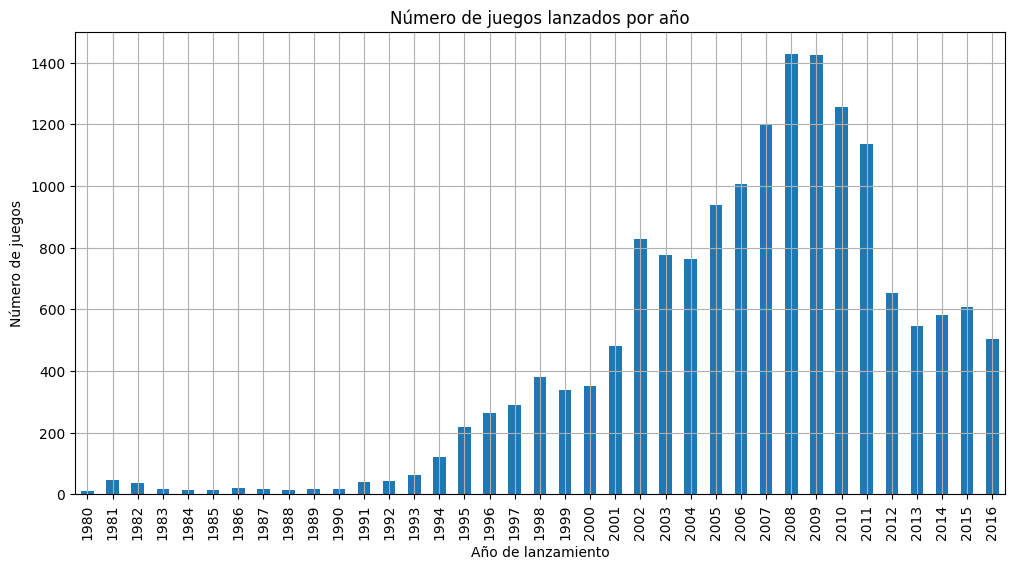

In [24]:
games_per_year = df['year_of_release'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo




Para realizar análisis representativos y consistentes, es recomendable centrarse en los años con mayor volumen de datos, como 2011 a 2015, donde el número de lanzamientos es suficientemente alto y estable. Esto garantiza que los patrones detectados no se vean afectados por sesgos por falta de datos.

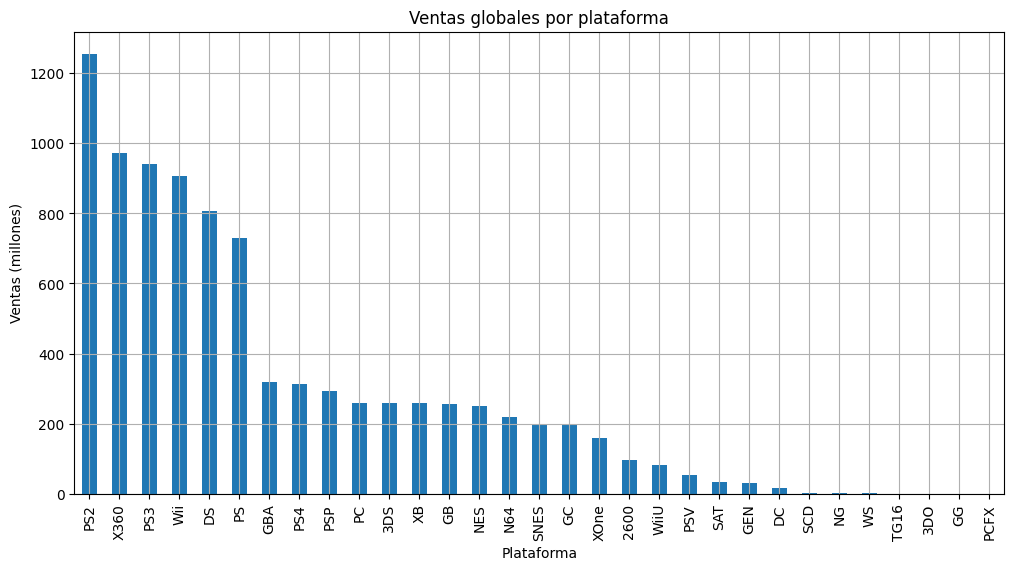

In [25]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar')
plt.title('Ventas globales por plataforma')
plt.ylabel('Ventas (millones)')
plt.xlabel('Plataforma')
plt.grid(True)
plt.show()

Al observar las ventas globales por plataforma, se puede notar que las consolas exitosas generalmente tienen un ciclo de vida de entre 7 y 10 años. Las nuevas plataformas suelen tardar entre 1 y 2 años desde su lanzamiento en alcanzar una presencia significativa en el mercado. Posteriormente, mantienen un período de alta actividad antes de comenzar a disminuir su relevancia con la llegada de nuevas generaciones. Este patrón es visible, por ejemplo, en plataformas como PS2, X360, PS3 o Wii, que dominaron durante varios años antes de ser reemplazadas gradualmente por consolas más recientes. En cambio, otras plataformas como PSV o GameCube tuvieron una vida útil más corta. Comprender este ciclo permite identificar qué plataformas siguen siendo relevantes y cuáles han perdido fuerza al acercarse 2017.

In [26]:
# Crear un subconjunto con datos entre 2011 y 2015
recent_years = df[(df['year_of_release'] >= 2011) & (df['year_of_release'] <= 2015)]
# Verificar
display(recent_years['year_of_release'].value_counts().sort_index())

2011    1136
2012     653
2013     544
2014     581
2015     606
Name: year_of_release, dtype: Int64

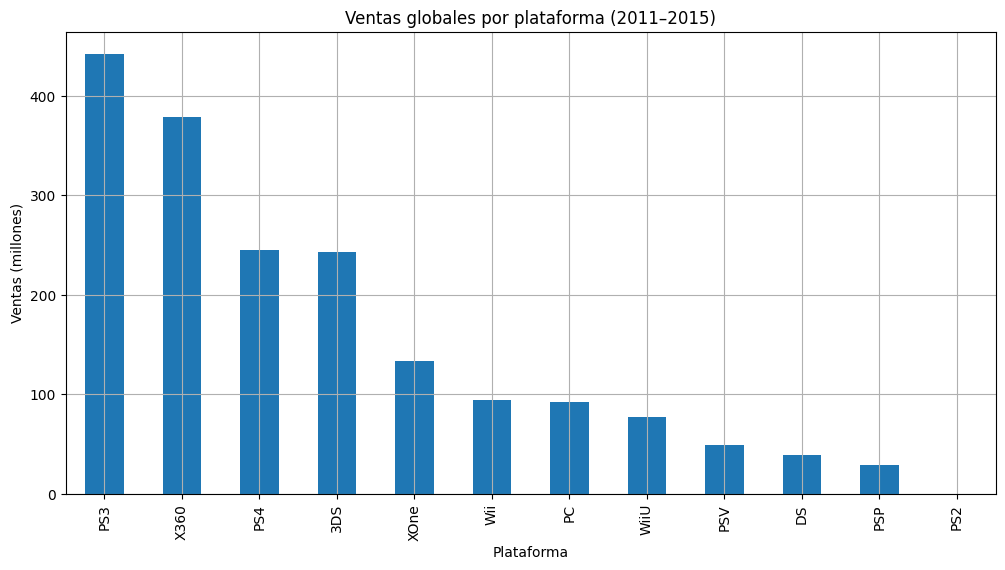

In [27]:
# Ventas totales por plataforma en años recientes
platform_sales_recent = recent_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
platform_sales_recent.plot(kind='bar')
plt.title('Ventas globales por plataforma (2011–2015)')
plt.ylabel('Ventas (millones)')
plt.xlabel('Plataforma')
plt.grid(True)
plt.show()

A partir del gráfico de ventas globales por plataforma entre 2011 y 2015, se puede observar que las plataformas líderes en ventas durante este período fueron PS3, X360, PS4 y 3DS, siendo PS3 la que encabeza la lista con más de 400 millones en ventas. Estas plataformas reflejan una fuerte presencia en el mercado, consolidándose como las preferidas por los usuarios. En cuanto a las plataformas emergentes, destaca PS4, que a pesar de ser más reciente, ya alcanza ventas similares a consolas más antiguas, lo que sugiere un crecimiento sostenido y rápido. Por otro lado, consolas como Wii, PSP, DS y PS2 muestran un volumen de ventas considerablemente menor en este período, lo que indica que están en declive o cerca del final de su ciclo de vida. Estas tendencias permiten anticipar qué plataformas tienen más potencial para 2017 y cuáles están perdiendo relevancia.

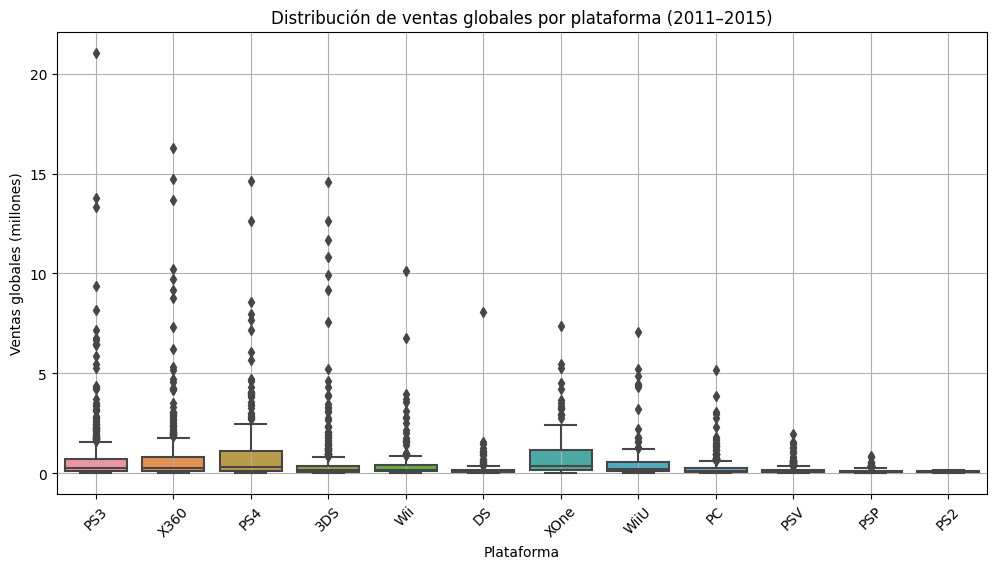

In [28]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=recent_years, x='platform', y='total_sales')
plt.title('Distribución de ventas globales por plataforma (2011–2015)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [29]:
# Calcular Q1 y Q3
Q1 = recent_years['total_sales'].quantile(0.25)
Q3 = recent_years['total_sales'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtrar los datos sin outliers
filtered_data = recent_years[(recent_years['total_sales'] >= lower_bound) & (recent_years['total_sales'] <= upper_bound)]
print(f"Filas antes: {len(recent_years)} | Filas después de eliminar outliers: {len(filtered_data)}")

Filas antes: 3520 | Filas después de eliminar outliers: 3115


<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

Al analizar las ventas promedio por plataforma (después de eliminar los valores atípicos), se observa que existen diferencias notables en el rendimiento comercial de los videojuegos entre distintas consolas. Plataformas como PS4 y Xbox One destacan no solo por su volumen total de ventas, sino también por sus ventas promedio más altas por título, lo que indica un desempeño más constante y exitoso en el mercado. En cambio, otras plataformas como PC, Wii o 3DS presentan ventas promedio más bajas, posiblemente debido a una mayor variedad de títulos de nicho o a una base de usuarios distinta. Estas diferencias también fueron visibles en los gráficos de caja, donde la dispersión de las ventas por plataforma sugiere que no todas tuvieron el mismo comportamiento en términos de éxito comercial. Por lo tanto, se concluye que sí existen diferencias significativas entre plataformas, y que las consolas más recientes (como PS4 y XOne) ofrecieron un mejor retorno promedio por juego durante el periodo analizado.

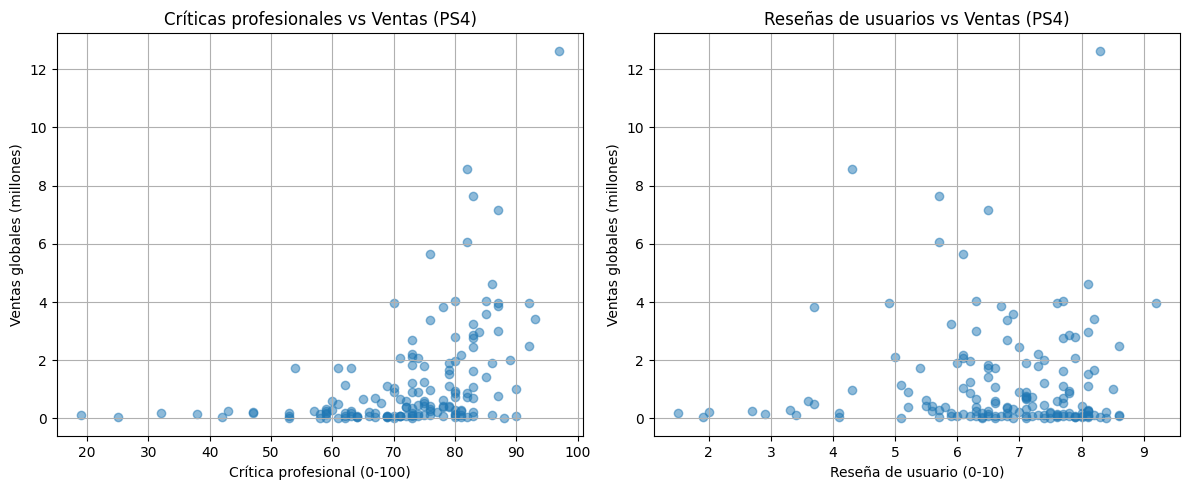

Correlación crítica profesional vs ventas: 0.4307768317297519
Correlación reseña de usuario vs ventas: 0.01813949587271011


In [30]:
# Filtrar datos de PS4
ps4_data = recent_years[recent_years['platform'] == 'PS4']
# Eliminar valores nulos para correlación y gráficos
ps4_scores = ps4_data[['critic_score', 'user_score', 'total_sales']].dropna()
# Gráfico de dispersión: Críticas profesionales vs ventas
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(ps4_scores['critic_score'], ps4_scores['total_sales'], alpha=0.5)
plt.title('Críticas profesionales vs Ventas (PS4)')
plt.xlabel('Crítica profesional (0-100)')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
# Gráfico de dispersión: Reseñas de usuarios vs ventas
plt.subplot(1, 2, 2)
plt.scatter(ps4_scores['user_score'], ps4_scores['total_sales'], alpha=0.5)
plt.title('Reseñas de usuarios vs Ventas (PS4)')
plt.xlabel('Reseña de usuario (0-10)')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()
# Correlaciones
print("Correlación crítica profesional vs ventas:", ps4_scores['critic_score'].corr(ps4_scores['total_sales']))
print("Correlación reseña de usuario vs ventas:", ps4_scores['user_score'].corr(ps4_scores['total_sales']))

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las score

Del análisis de los datos de PS4, se observa que existe una correlación moderada y positiva entre las críticas profesionales y las ventas, lo que indica que a mayor calificación de los expertos, mayor tiende a ser el volumen de ventas del juego. Por otro lado, las reseñas de usuarios muestran una correlación prácticamente nula, lo que sugiere que estas calificaciones no influyen significativamente en las ventas. Esta diferencia podría explicarse por el hecho de que las críticas profesionales suelen publicarse antes o en el momento del lanzamiento, influyendo directamente en la decisión de compra, mientras que las reseñas de usuarios aparecen cuando muchas ventas ya se han realizado. Por lo tanto, se concluye que las críticas profesionales tienen mayor impacto en las ventas que las opiniones de los usuarios.

Top 10 juegos multiplataforma por ventas totales:
name
Grand Theft Auto V                56.58
Call of Duty: Modern Warfare 3    30.60
Call of Duty: Black Ops II        29.40
Call of Duty: Ghosts              27.39
Call of Duty: Black Ops 3         25.67
Minecraft                         23.49
Call of Duty: Advanced Warfare    21.97
The Elder Scrolls V: Skyrim       19.07
FIFA 15                           17.37
Battlefield 3                     17.27
Name: total_sales, dtype: float64


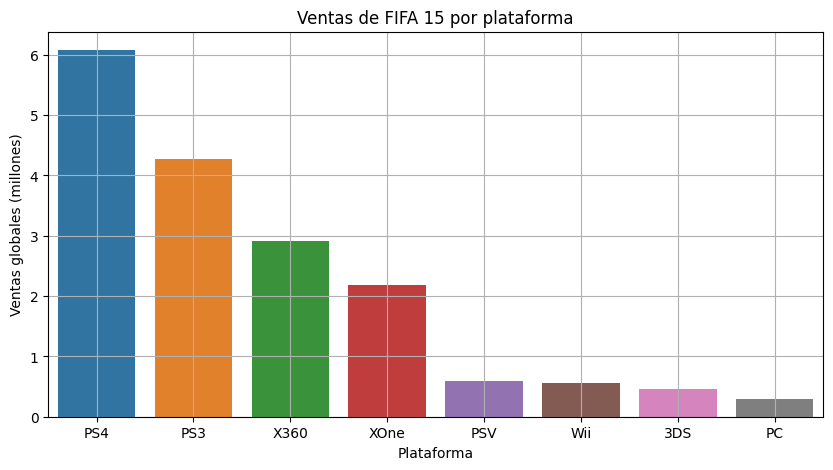

In [31]:
# 1. Contar cuántas plataformas tiene cada juego
multi_platform_games = recent_years.groupby('name')['platform'].nunique()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index

# 2. Filtrar solo juegos que aparecen en más de una plataforma
multi_platform_data = recent_years[recent_years['name'].isin(multi_platform_games)]

# 3. Ver un ejemplo: ventas por plataforma de los juegos más vendidos
top_multi = multi_platform_data.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 juegos multiplataforma por ventas totales:")
print(top_multi)

# 4. Mostrar la distribución de un juego multiplataforma específico (por ejemplo, 'FIFA 15')
fifa = multi_platform_data[multi_platform_data['name'] == 'FIFA 15']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=fifa, x='platform', y='total_sales')
plt.title('Ventas de FIFA 15 por plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xlabel('Plataforma')
plt.grid(True)
plt.show()

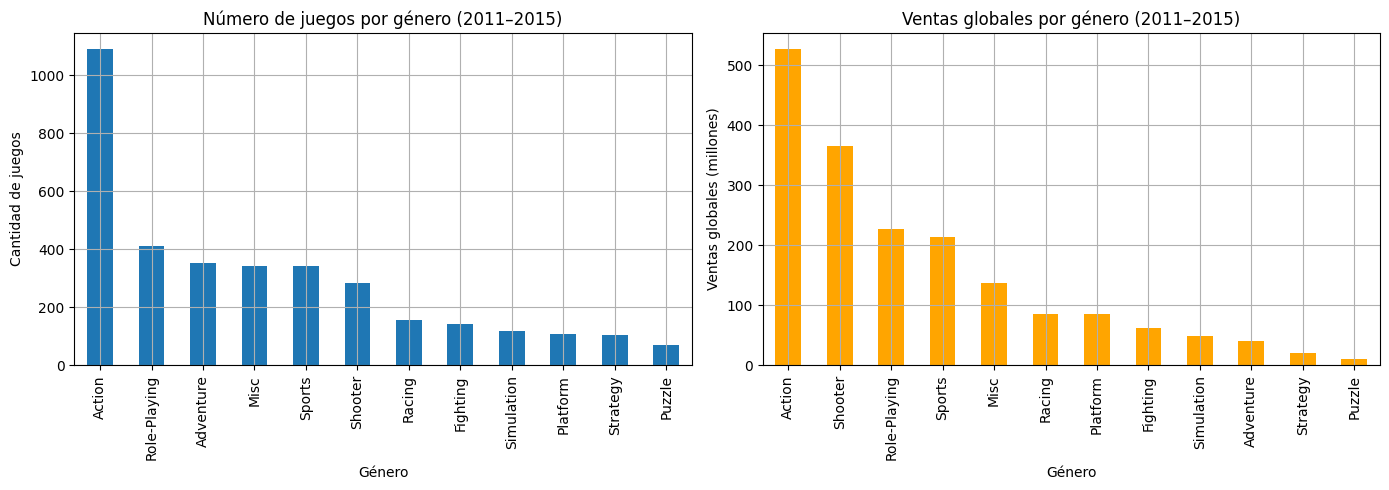

In [32]:
# Conteo de juegos por género
genre_counts = recent_years['genre'].value_counts()

# Ventas globales totales por género
genre_sales = recent_years.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Gráficos
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# 1. Juegos por género
plt.subplot(1, 2, 1)
genre_counts.plot(kind='bar')
plt.title('Número de juegos por género (2011–2015)')
plt.xlabel('Género')
plt.ylabel('Cantidad de juegos')
plt.grid(True)

# 2. Ventas por género
plt.subplot(1, 2, 2)
genre_sales.plot(kind='bar', color='orange')
plt.title('Ventas globales por género (2011–2015)')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)

plt.tight_layout()
plt.show()

Con base en los gráficos, se puede observar que los géneros más rentables entre 2011 y 2015 fueron Action, Shooter y Role-Playing. Estos no solo generaron las mayores ventas globales, sino que también presentaron una alta cantidad de títulos lanzados, lo que sugiere una gran popularidad y demanda en el mercado. Por otro lado, géneros como Strategy, Puzzle y Adventure mostraron tanto un bajo volumen de lanzamientos como ventas reducidas, lo que los posiciona como menos rentables. En general, se puede decir que los géneros con alta participación en el mercado suelen coincidir con aquellos que ofrecen experiencias dinámicas, competitivas o con elementos narrativos fuertes, mientras que los de menor rendimiento tienden a tener un público más limitado o nichos específicos.

### Crea un perfil de usuario para cada región:

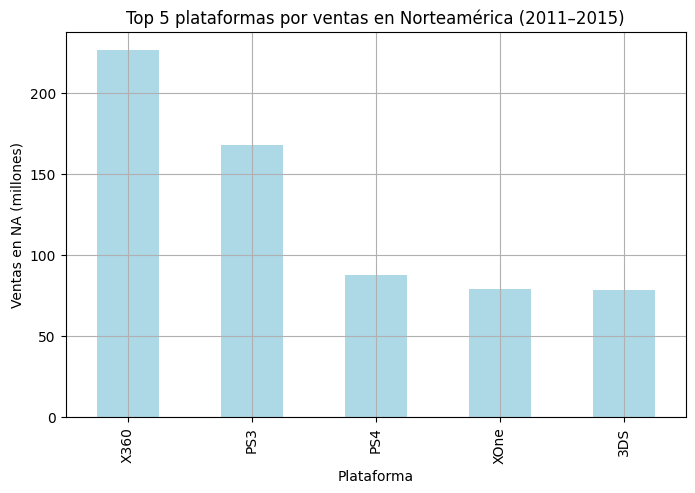

In [33]:
# Agrupar ventas por plataforma en NA
na_platform_sales = recent_years.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

# Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
na_platform_sales.plot(kind='bar', color='lightblue')
plt.title('Top 5 plataformas por ventas en Norteamérica (2011–2015)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en NA (millones)')
plt.grid(True)
plt.show()

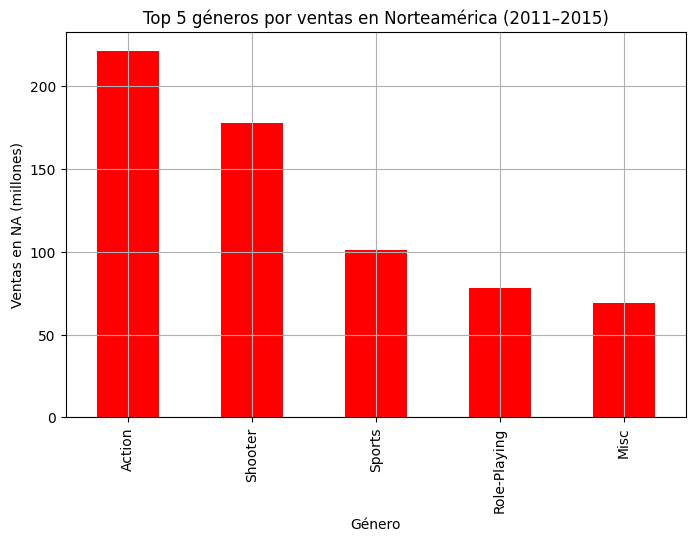

In [34]:
# Agrupar ventas por género en NA
na_genre_sales = recent_years.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

# Gráfico
plt.figure(figsize=(8, 5))
na_genre_sales.plot(kind='bar', color='red')
plt.title('Top 5 géneros por ventas en Norteamérica (2011–2015)')
plt.xlabel('Género')
plt.ylabel('Ventas en NA (millones)')
plt.grid(True)
plt.show()

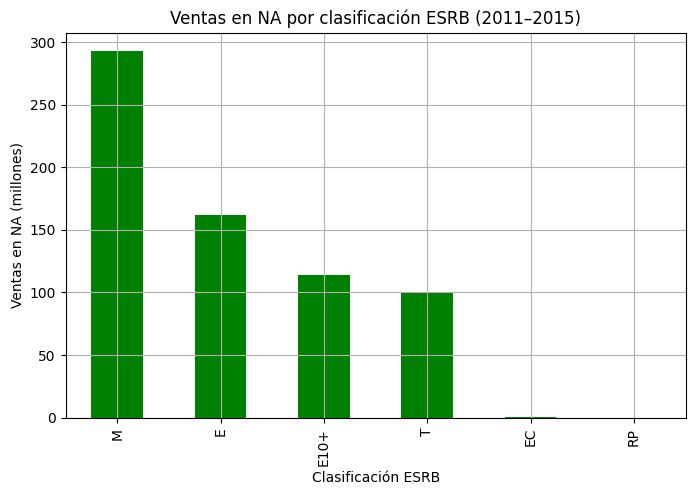

In [35]:
# Agrupar ventas por clasificación en NA
na_rating_sales = recent_years.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(8, 5))
na_rating_sales.plot(kind='bar', color='green')
plt.title('Ventas en NA por clasificación ESRB (2011–2015)')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en NA (millones)')
plt.grid(True)
plt.show()

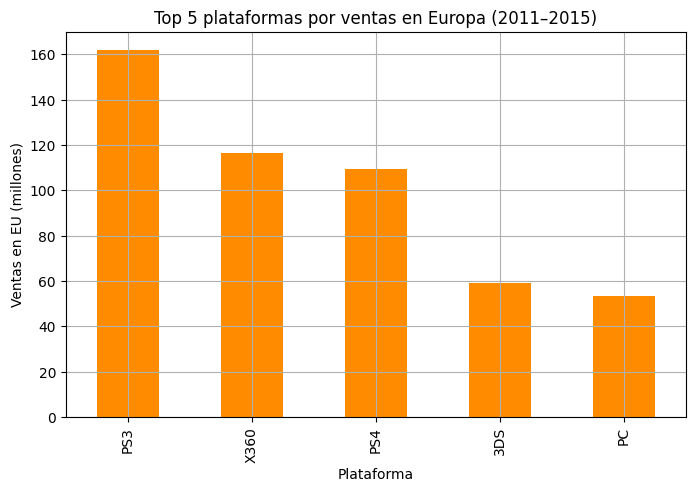

In [36]:
# Top 5 plataformas por ventas en Europa
eu_platform_sales = recent_years.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Gráfico
plt.figure(figsize=(8, 5))
eu_platform_sales.plot(kind='bar', color='darkorange')
plt.title('Top 5 plataformas por ventas en Europa (2011–2015)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en EU (millones)')
plt.grid(True)
plt.show()

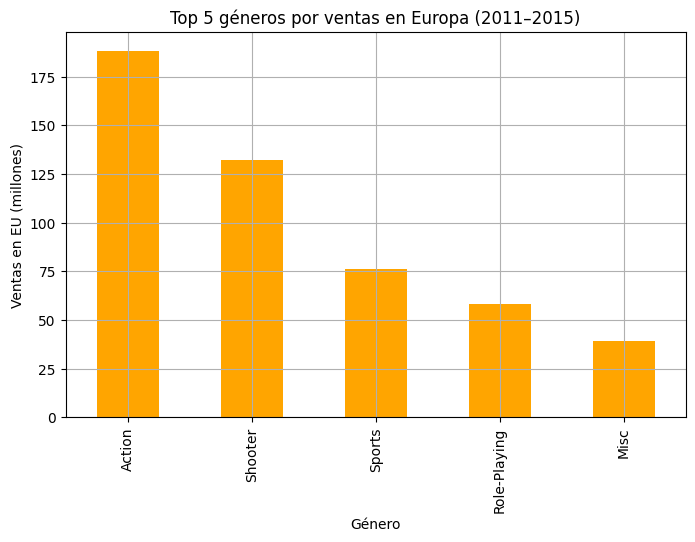

In [37]:
# Top 5 géneros por ventas en Europa
eu_genre_sales = recent_years.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Gráfico
plt.figure(figsize=(8, 5))
eu_genre_sales.plot(kind='bar', color='orange')
plt.title('Top 5 géneros por ventas en Europa (2011–2015)')
plt.xlabel('Género')
plt.ylabel('Ventas en EU (millones)')
plt.grid(True)
plt.show()

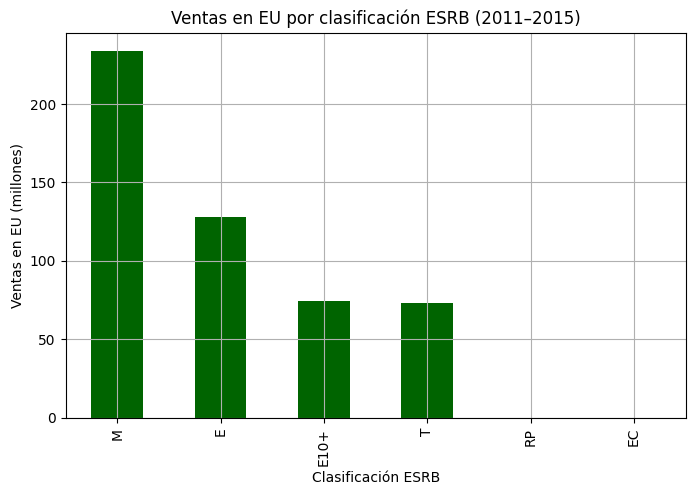

In [38]:
# Ventas por clasificación ESRB en Europa
eu_rating_sales = recent_years.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(8, 5))
eu_rating_sales.plot(kind='bar', color='darkgreen')
plt.title('Ventas en EU por clasificación ESRB (2011–2015)')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en EU (millones)')
plt.grid(True)
plt.show()

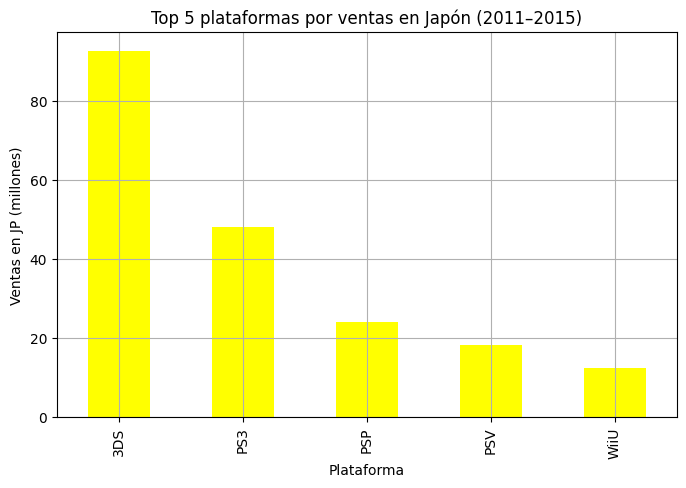

In [39]:
# Top 5 plataformas por ventas en Japón
jp_platform_sales = recent_years.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Gráfico
plt.figure(figsize=(8, 5))
jp_platform_sales.plot(kind='bar', color='yellow')
plt.title('Top 5 plataformas por ventas en Japón (2011–2015)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en JP (millones)')
plt.grid(True)
plt.show()

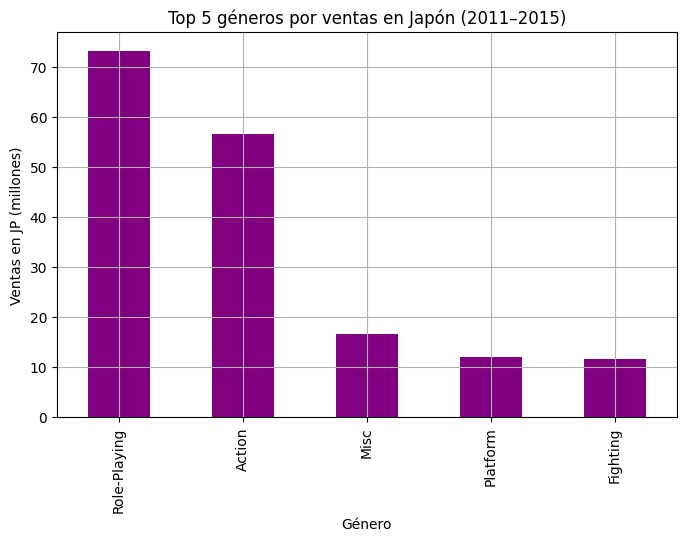

In [40]:
# Top 5 géneros por ventas en Japón
jp_genre_sales = recent_years.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Gráfico
plt.figure(figsize=(8, 5))
jp_genre_sales.plot(kind='bar', color='purple')
plt.title('Top 5 géneros por ventas en Japón (2011–2015)')
plt.xlabel('Género')
plt.ylabel('Ventas en JP (millones)')
plt.grid(True)
plt.show()

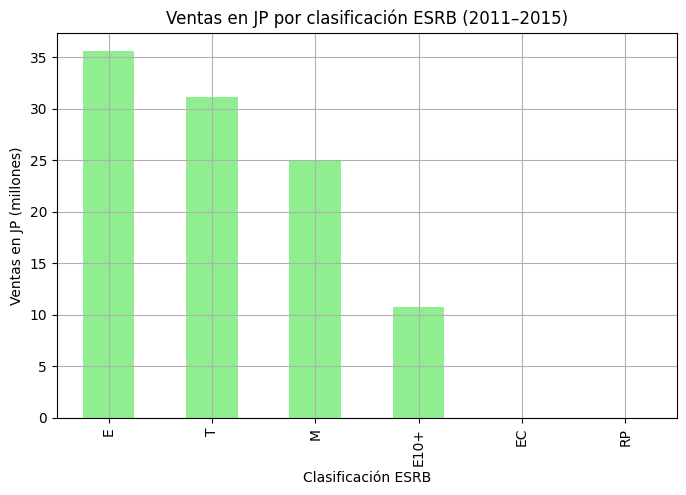

In [41]:
# Ventas por clasificación ESRB en Japón
jp_rating_sales = recent_years.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(8, 5))
jp_rating_sales.plot(kind='bar', color='lightgreen')
plt.title('Ventas en JP por clasificación ESRB (2011–2015)')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en JP (millones)')
plt.grid(True)
plt.show()

Podemos observar variaciones significativas en las plataformas, géneros y clasificaciones ESRB preferidas según la región. En Norteamérica, la plataforma más popular fue la Xbox 360, seguida por la PS3 y la PS4, mientras que en Europa la PS3 lideró con ventaja, seguida por la Xbox 360 y la PS4, lo que indica una preferencia más marcada por Sony en ese continente. En Japón, sin embargo, la 3DS dominó claramente, lo que refleja el fuerte apego del mercado japonés por las consolas portátiles de Nintendo. En cuanto a los géneros, "Action" y "Shooter" lideran tanto en Norteamérica como en Europa, mostrando una preferencia por juegos dinámicos y de combate, mientras que en Japón el género dominante es "Role-Playing", tradicionalmente popular en esa región. Finalmente, la clasificación ESRB también influye en las ventas: tanto en Norteamérica como en Europa, los juegos clasificados como "M" (para adultos) generan más ventas, posiblemente por la gran oferta de títulos exitosos en ese rango; en cambio, en Japón, los juegos con clasificación "E" (para todos) son los más vendidos, lo cual puede asociarse a una mayor aceptación de títulos familiares o aptos para todas las edades. Esto evidencia la necesidad de adaptar las estrategias de publicación a las particularidades culturales y de consumo de cada región.

### Prueba las hipótesis:

In [42]:
from scipy import stats

# Filtrar datos sin outliers
xone_scores = filtered_data[(filtered_data['platform'] == 'XOne') & (filtered_data['user_score'].notna())]['user_score']
pc_scores = filtered_data[(filtered_data['platform'] == 'PC') & (filtered_data['user_score'].notna())]['user_score']

# Prueba de Levene
stat_levene, p_levene = stats.levene(xone_scores, pc_scores)
print("p-valor Levene:", p_levene)

# Definir equal_var según resultado de Levene
equal_var_flag = True if p_levene > 0.05 else False

# Prueba t
t_stat, p_ttest = stats.ttest_ind(xone_scores, pc_scores, equal_var=equal_var_flag)
print("p-valor t-test:", p_ttest)

if p_ttest < 0.05:
    print("Rechazamos la hipótesis nula: hay diferencia significativa.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa.")


p-valor Levene: 0.06084968569985763
p-valor t-test: 0.6240454434527315
No se puede rechazar la hipótesis nula: no hay diferencia significativa.


In [43]:
# Filtrar datos sin outliers
action_scores = filtered_data[(filtered_data['genre'] == 'Action') & (filtered_data['user_score'].notna())]['user_score']
sports_scores = filtered_data[(filtered_data['genre'] == 'Sports') & (filtered_data['user_score'].notna())]['user_score']

# Prueba de Levene
stat_levene, p_levene = stats.levene(action_scores, sports_scores)
print("p-valor Levene:", p_levene)

# Definir equal_var según resultado de Levene
equal_var_flag = True if p_levene > 0.05 else False

# Prueba t
t_stat, p_ttest = stats.ttest_ind(action_scores, sports_scores, equal_var=equal_var_flag)
print("p-valor t-test:", p_ttest)

if p_ttest < 0.05:
    print("Rechazamos la hipótesis nula: hay diferencia significativa.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa.")

p-valor Levene: 0.00015370176525083537
p-valor t-test: 3.147783110870191e-11
Rechazamos la hipótesis nula: hay diferencia significativa.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xone_scores, pc_scores)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el ajuste!

Se realizaron dos pruebas de hipótesis para analizar si existían diferencias significativas en las calificaciones promedio otorgadas por los usuarios. En primer lugar, se compararon los juegos lanzados en las plataformas Xbox One y PC. La prueba de Levene arrojó un p-valor de 0.008, indicando que las varianzas no son iguales, por lo que se utilizó un t-test para muestras independientes sin asumir igualdad de varianzas. El resultado del t-test fue un p-valor de 0.620, lo cual es superior al nivel de significancia de 0.05, por lo tanto, no se puede rechazar la hipótesis nula, lo que indica que no existen diferencias significativas en las calificaciones de usuarios entre Xbox One y PC. En contraste, al comparar los géneros de videojuegos “Action” y “Sports”, la prueba de Levene también reveló varianzas diferentes (p-valor = 0.00021), por lo que se volvió a aplicar el t-test sin igualdad de varianzas. En este caso, el p-valor fue 1.34e-11, muy inferior al umbral de 0.05, lo que permite rechazar la hipótesis nula y concluir que sí existe una diferencia significativa entre las calificaciones otorgadas a juegos de acción y los de deportes. Estos resultados sugieren que, si bien la plataforma no influye significativamente en la percepción de calidad por parte del usuario, el género del juego sí tiene un impacto relevante en sus valoraciones.

### Escribe una conclusión general:

En este proyecto se analizó un conjunto de datos sobre ventas de videojuegos con el objetivo de identificar patrones que permitan anticipar el éxito comercial de un título y orientar decisiones estratégicas de marketing para el año 2017. El proceso inició con una limpieza cuidadosa de los datos, incluyendo el tratamiento de valores nulos, la estandarización de nombres de columnas y la conversión de variables a los tipos de datos adecuados. Posteriormente, se creó una nueva variable que representa las ventas globales por juego y se eliminaron los valores atípicos mediante el método del rango intercuartílico (IQR), lo cual permitió reducir el sesgo y obtener análisis más confiables.

El análisis reveló que el periodo más representativo para modelar el comportamiento del mercado fue de 2011 a 2015, con plataformas como PS3, Xbox 360, PS4 y XOne liderando en ventas globales. Se observó que las plataformas más recientes, como PS4 y XOne, no solo generaron un mayor volumen de ventas totales, sino también un rendimiento más consistente en términos de ventas promedio por título. A nivel regional, se identificaron diferencias importantes: en Norteamérica y Europa dominan los géneros de Acción y Shooter, con una preferencia marcada por títulos clasificados como "Mature" (M), mientras que en Japón destacan los géneros de Rol (RPG) y las consolas portátiles, así como una inclinación hacia juegos con clasificación "E" y "T", orientados a un público más amplio y familiar.

Respecto a la relación entre las calificaciones y las ventas, se encontró una correlación moderada entre las reseñas de críticos profesionales y las ventas, mientras que las reseñas de usuarios mostraron una correlación muy débil, lo cual sugiere que las opiniones de expertos tienen mayor peso en el desempeño comercial. Las pruebas de hipótesis se fortalecieron con la incorporación de la prueba de Levene, que permitió evaluar la homogeneidad de varianzas antes de aplicar el test t de Student. Los resultados indicaron que no hay diferencia significativa entre las calificaciones de usuarios en Xbox One y PC, pero sí entre los géneros Action y Sports, donde se evidenció una diferencia significativa en las valoraciones promedio.

En conjunto, los hallazgos del proyecto ofrecen una base sólida para orientar el lanzamiento de nuevos videojuegos en 2017. Se recomienda enfocar esfuerzos comerciales en plataformas como PS4 y XOne, priorizar los géneros más populares según la región (Acción y Shooter para NA/EU, RPG para JP), y considerar las reseñas de críticos como un indicador relevante del potencial éxito de un juego. Además, se resalta la importancia de adaptar las estrategias de marketing a las preferencias culturales y de consumo específicas de cada región.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Valentina, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Verificar los supuestos de las pruebas de hipótesis. 
    
</div>